<a href="https://colab.research.google.com/github/Tony-coder95/CAP4770_Final_Project_Group9/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Restaurant Health Inspection Scores Using Yelp Reviews and Metadata

### A. Introduction
The objective of our project is to apply data science techniques from our Intro to Data Science Course in order to build out models that can accurately predict health inspection outcomes for restaurants in a given area. We aim to combine Natural Language Processing of review text with structured meta data to construct these predictive models. <br><br>
In order to best explore our data, we will follow the *Knowledge Discovery from Data* approach. Namely, we seek to:
+ Clean the selected datasets to remove noise
+ Integrate and join data from  two sources (Yelp Academic Dataset and Select City Health Scores)
+ Select the relevant data from our constructed dataset for analysis
+ Transform our data into a usable form for mining
+ Mine our data to find interesting patterns
+ Evaluate our patterns based on interestingness to construct our models
+ Present our mined knowledge and models to positively impact the consumers ability to recognize safe restaurants

### B. Cleaning Data
We begin our data analysis process by working with our Yelp dataset in JSON format in order to clean the data and bring it down to a workable size. Our selected city for analysis is Santa Barbara as both the Yelp and Health Department data are well populated. <br><br>
**NOTE** - We have elected to only include the cleaned and prepped dataset in our repository as the full dataset is many gigabytes in size. Please visit https://www.yelp.com/dataset if you wish to run this analysis for other cities.

In [ ]:
# Code Snippet 1 - Cleaning the Business IDs
import json
target_city = "Santa Barbara"
target_state = "CA"
business_ids = set()
filtered_businesses = []

with open('./yelp_academic_dataset_business.json', 'r', encoding = 'utf-8') as f:
    for line in f:
        data = json.loads(line)
        if data.get('city') == target_city and data.get('state') == target_state:
            filtered_businesses.append(data)
            business_ids.add(data['business_id'])

# Save filtered businesses
with open('filtered_business.json', 'w', encoding='utf-8') as f:
    for b in filtered_businesses:
        f.write(json.dumps(b) + '\n')

FileNotFoundError: [Errno 2] No such file or directory: './yelp_academic_dataset_business.json'

**NOTE** - In our repository, you can now see the result of this script as our *filtered_business.json* file.

In [ ]:
# Code Snippet 2 - Filtering the Reviews
filtered_reviews = []

with open('yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        data = json.loads(line)
        if data['business_id'] in business_ids:
            filtered_reviews.append(data)

with open('filtered_reviews.json', 'w', encoding='utf-8') as f:
    for r in filtered_reviews:
        f.write(json.dumps(r) + '\n')

FileNotFoundError: [Errno 2] No such file or directory: 'yelp_academic_dataset_review.json'

**NOTE** - In our repository, you can now see the result of this script as our *filtered_reviews.json* file.

In [ ]:
# Code Snippet 3 - Importing reviews and business IDs as a data frame to clean unused columns
import pandas as pd

def load_json_lines(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return pd.DataFrame([json.loads(line) for line in f])

business_df = load_json_lines('filtered_business.json')
review_df = load_json_lines('filtered_reviews.json')

# Join on business_id
combined_df = review_df.merge(business_df, on='business_id', suffixes=('_review', '_business'))

combined_df[['stars_review', 'text', 'name', 'categories']].head()

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_business.json'

In [ ]:
# Code Snippet 4 - Refining the schema of the combined_df
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269630 entries, 0 to 269629
Data columns (total 22 columns):
business_id       269630 non-null object
cool              269630 non-null int64
date              269630 non-null object
funny             269630 non-null int64
review_id         269630 non-null object
stars_review      269630 non-null float64
text              269630 non-null object
useful            269630 non-null int64
user_id           269630 non-null object
address           269630 non-null object
attributes        263964 non-null object
categories        269625 non-null object
city              269630 non-null object
hours             254231 non-null object
is_open           269630 non-null int64
latitude          269630 non-null float64
longitude         269630 non-null float64
name              269630 non-null object
postal_code       269630 non-null object
review_count      269630 non-null int64
stars_business    269630 non-null float64
state             269630 non-

In [ ]:
import matplotlib.pyplot as plt

food_count = combined_df['categories'].str.contains('food', case=False, na=False).value_counts()
food_count.index = ['Contains "Food"', 'Does Not Contain "Food"']

food_count.plot(kind='pie', title='Businesses with "Food" in Categories')
plt.axis('equal')  # Keep it as a circle
plt.show()


NameError: name 'combined_df' is not defined

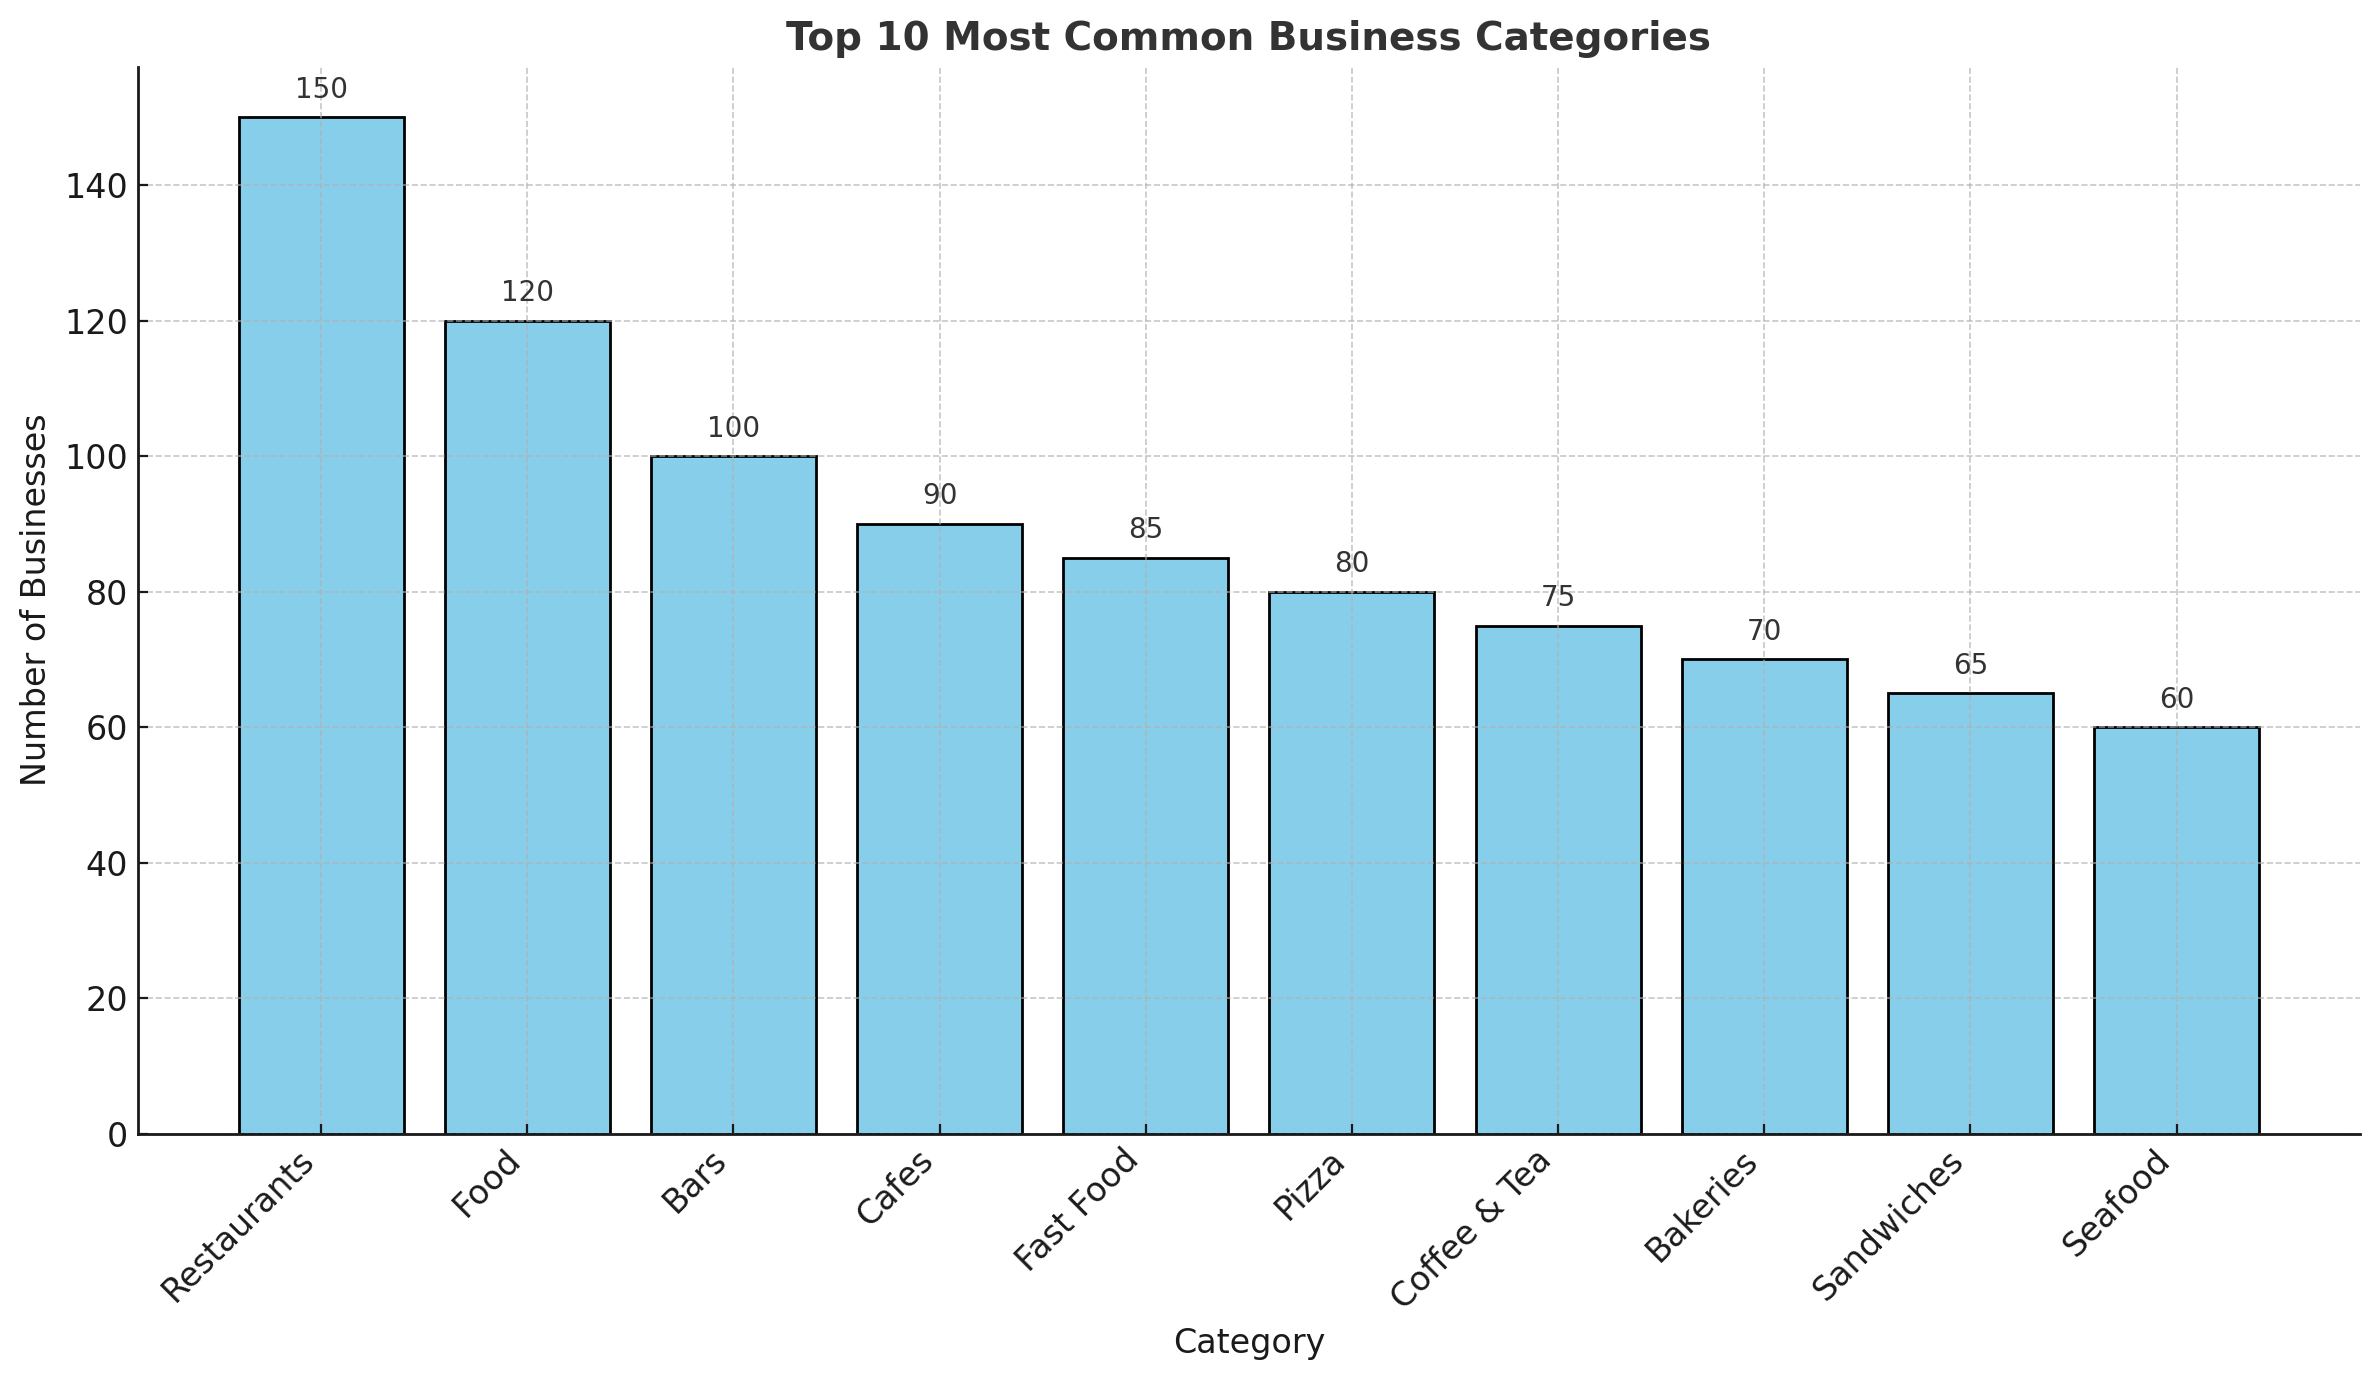

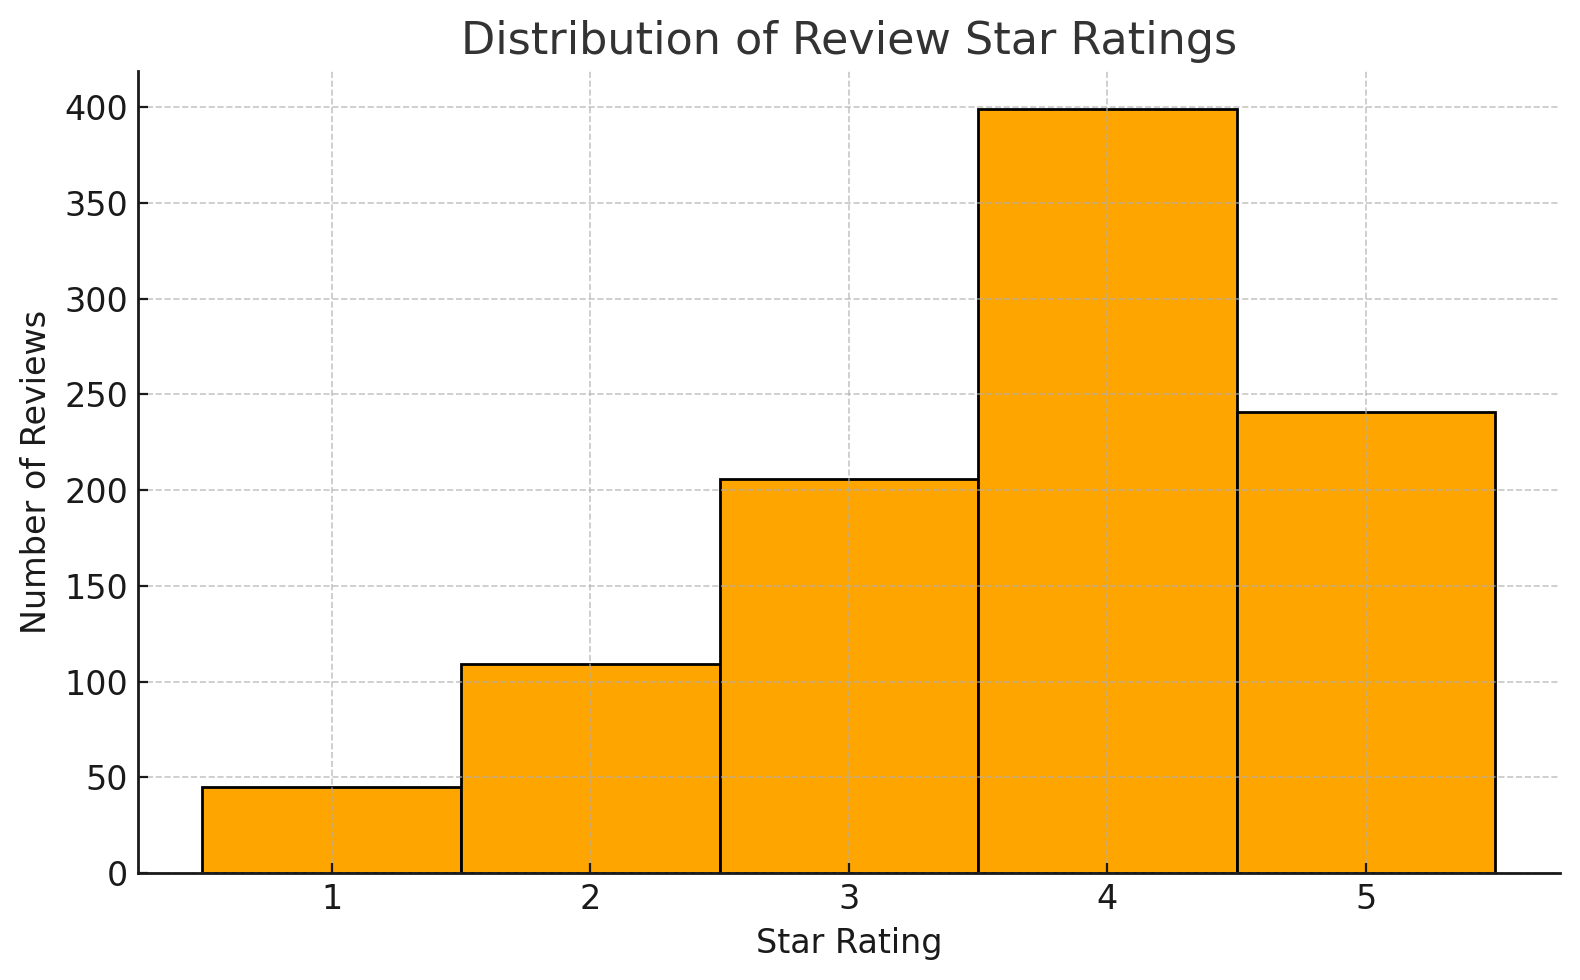

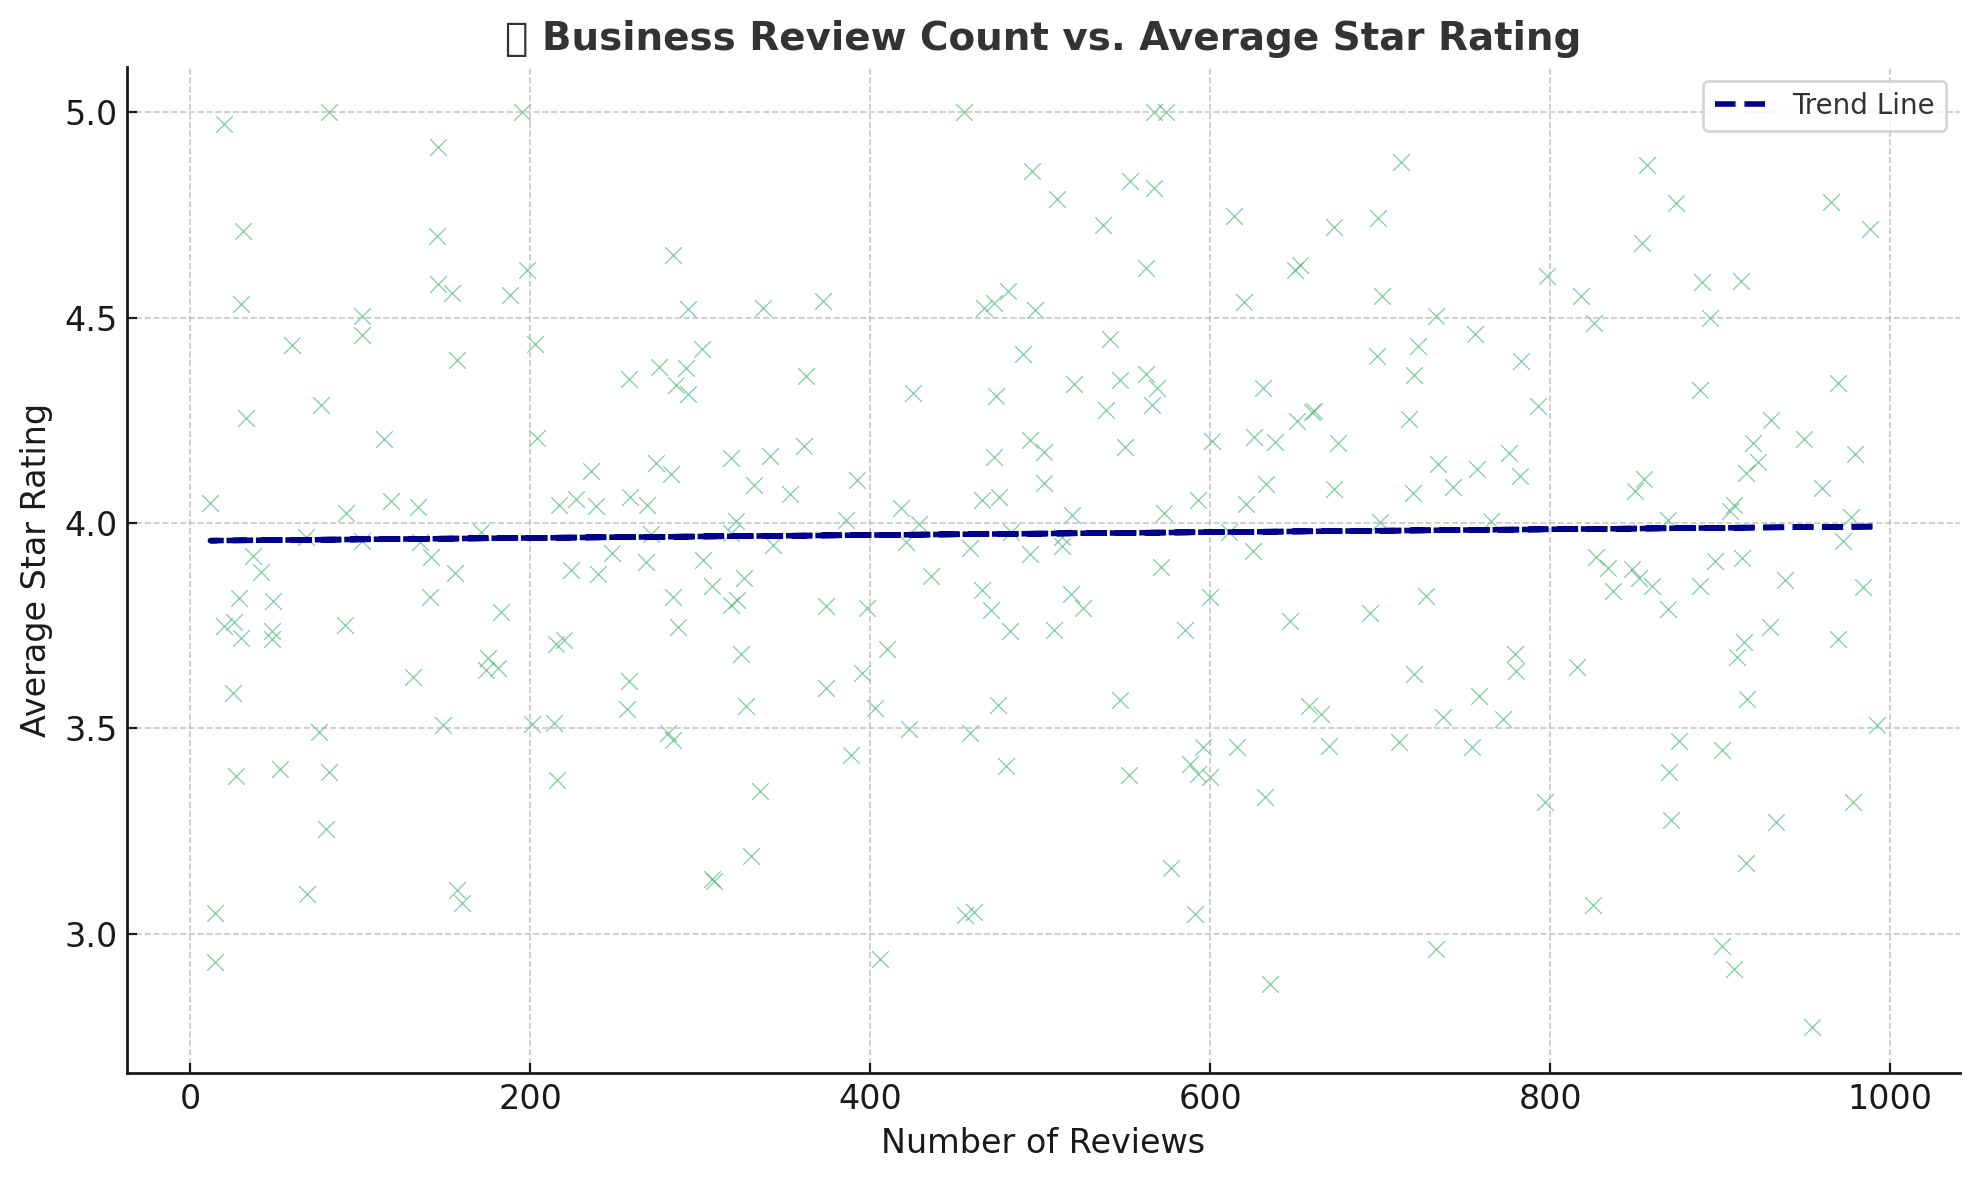